In [2]:
import numpy as np
import pandas as pd
import sympy
import random

In [3]:
df=pd.read_json("https://github.com/restrepo/anomaly/raw/main/solutions.json.gz")
df

,l,k,solution,gcd,n
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11
...,...,...,...,...,...
390069,"[-3, -15, -6]","[-3, 8, 9]","[8, -9, -9, 11, 25, -29, -29, 32]",36,8
390070,"[-10, -5, -15]","[-10, -12, 12]","[5, 5, 5, -17, -27, -27, 28, 28]",100,8
390071,"[15, -1, 15]","[-14, -13, -14]","[14, -15, -16, 17, -30, 31, 31, -32]",1,8
390072,"[-15, -9, -1]","[-13, -14, -12]","[11, -13, -15, 19, 23, -26, -30, 31]",18,8


In [4]:
max_ = []
for i in range(0, len(df)):
    l = []
    for n in range(0, len(list(df['solution'][i]))):
        l.append(abs(list(df['solution'][i])[n]))
    max_.append(max(l))

df['smax'] = max_
df

,l,k,solution,gcd,n,smax
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11,6
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7,4
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12,6
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12,7
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11,8
...,...,...,...,...,...,...
390069,"[-3, -15, -6]","[-3, 8, 9]","[8, -9, -9, 11, 25, -29, -29, 32]",36,8,32
390070,"[-10, -5, -15]","[-10, -12, 12]","[5, 5, 5, -17, -27, -27, 28, 28]",100,8,28
390071,"[15, -1, 15]","[-14, -13, -14]","[14, -15, -16, 17, -30, 31, 31, -32]",1,8,32
390072,"[-15, -9, -1]","[-13, -14, -12]","[11, -13, -15, 19, 23, -26, -30, 31]",18,8,31


In [5]:
l1 = []
for i in range(0, len(df)):
    l1.append(sum(df['solution'][i]))
df['sum_s'] = l1
df

,l,k,solution,gcd,n,smax,sum_s
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11,6,0
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7,4,0
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12,6,0
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12,7,0
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11,8,0
...,...,...,...,...,...,...,...
390069,"[-3, -15, -6]","[-3, 8, 9]","[8, -9, -9, 11, 25, -29, -29, 32]",36,8,32,0
390070,"[-10, -5, -15]","[-10, -12, 12]","[5, 5, 5, -17, -27, -27, 28, 28]",100,8,28,0
390071,"[15, -1, 15]","[-14, -13, -14]","[14, -15, -16, 17, -30, 31, 31, -32]",1,8,32,0
390072,"[-15, -9, -1]","[-13, -14, -12]","[11, -13, -15, 19, 23, -26, -30, 31]",18,8,31,0


In [7]:
l2 = []
for i in range(0, len(l1)):
    l2.append(l1[i]**3)
df['sum_s^3'] = l2
df

,l,k,solution,gcd,n,smax,sum_s,sum_s^3
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11,6,0,0
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7,4,0,0
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12,6,0,0
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12,7,0,0
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11,8,0,0
...,...,...,...,...,...,...,...,...
390069,"[-3, -15, -6]","[-3, 8, 9]","[8, -9, -9, 11, 25, -29, -29, 32]",36,8,32,0,0
390070,"[-10, -5, -15]","[-10, -12, 12]","[5, 5, 5, -17, -27, -27, 28, 28]",100,8,28,0,0
390071,"[15, -1, 15]","[-14, -13, -14]","[14, -15, -16, 17, -30, 31, 31, -32]",1,8,32,0,0
390072,"[-15, -9, -1]","[-13, -14, -12]","[11, -13, -15, 19, 23, -26, -30, 31]",18,8,31,0,0


In [195]:
random.seed(1000319349)
n=random.randint(1,390073)
print(n)

104110


In [196]:
l=df["solution"][104110]
l

[4, -7, -7, 9, 9, -10, -11, 12, -14, 17, 19, -21]

In [197]:
p1=np.polynomial.Polynomial(l)
p1

Polynomial([  4.,  -7.,  -7.,   9.,   9., -10., -11.,  12., -14.,  17.,  19.,
       -21.], domain=[-1,  1], window=[-1,  1])

In [204]:
def f(x):
    return p1(x)

In [199]:
q = p1.deriv()
q

Polynomial([  -7.,  -14.,   27.,   36.,  -50.,  -66.,   84., -112.,  153.,
        190., -231.], domain=[-1.,  1.], window=[-1.,  1.])

In [200]:
r=np.roots(l)
r

array([ 1.98018186+0.j        , -0.91167357+0.90380977j,
       -0.91167357-0.90380977j, -1.17606639+0.j        ,
       -1.        +0.j        ,  0.00567719+1.00452973j,
        0.00567719-1.00452973j,  0.92948017+0.80253613j,
        0.92948017-0.80253613j,  1.        +0.j        ,
        0.89891696+0.j        ])

In [206]:
x=np.linspace(-2,2,1000)

C:\Users\valen\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


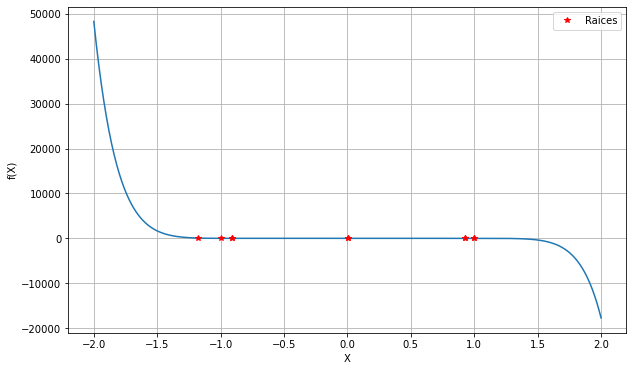

In [209]:
plt.figure(figsize=(10,6))
plt.plot(x,f(x))
plt.plot(r[1],0,'r*',label="Raices")
plt.plot(r[2],0,'r*')
plt.plot(r[3],0,'r*')
plt.plot(r[4],0,'r*')
plt.plot(r[5],0,'r*')
plt.plot(r[6],0,'r*')
plt.plot(r[7],0,'r*')
plt.plot(r[8],0,'r*')
plt.plot(r[9],0,'r*')
plt.plot(r[9],0,'r*')
plt.legend()
plt.xlabel('X')
plt.ylabel('f(X)')
plt.grid()
plt.show()

**Punto B**

In [89]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import random

In [22]:
random.seed(1000319349)
n=random.randint(1, 5)
print(n)

2


 Se elige la función:$$\frac{\sin x}{x}=+p\,$$

In [72]:
p=random.uniform(0,1)
print(p)

0.05252415214392836


Haciendo:  $$\frac{\sin x}{x}-p=0\$$

In [73]:
def f(x):
    return ((np.sin(x))/x)-p

In [94]:
X= np.linspace(-10,10,100)

In [121]:
root=optimize.brentq(f, 7.5, 10)
root1=optimize.brentq(f, -10, -7.5)
root2=optimize.brentq(f, -7.5, -5)
root3=optimize.brentq(f, -5, -2.5)
root4=optimize.brentq(f, 5, 7.5)
root5=optimize.brentq(f, -10, -7.5)
root6=optimize.brentq(f,2.5,5)

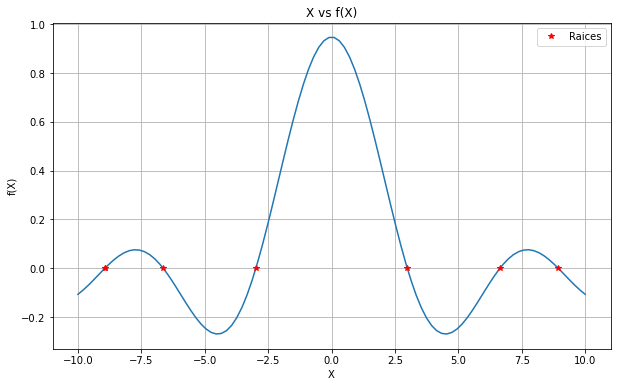

In [141]:
plt.figure(figsize=(10,6))
plt.plot(X,f(X))
plt.plot(root,0,'r*', label = "Raices")
plt.plot(root1,0,'r*')
plt.plot(root2,0,'r*')
plt.plot(root3,0,'r*')
plt.plot(root4,0,'r*')
plt.plot(root5,0,'r*')
plt.plot(root6,0,'r*')
plt.title("X vs f(X)")
plt.xlabel('X')
plt.ylabel('f(X)')
plt.legend()
plt.grid()
plt.show()